In [21]:
import numpy as np
import implementations as imp
import helpers as hlp
import preprocessing as pre
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load and clean data

In [22]:
cwd = os.getcwd()
path = cwd + "/dataset_to_release"

In [23]:
x_train_, x_test_, y_train_, train_ids_, test_ids_ = hlp.load_csv_data(path)

In [24]:
x = x_train_.copy()
x_submit = x_test_.copy()
y = y_train_.copy()

x_train, y_train, x_test, y_test = pre.split_data(x, y, 0.8)

In [25]:
correlation_thr = 0.8
nan_thr = 0.8
std_thr = 0.1

x_train_cleaned, x_test_cleaned = pre.clean_data(
    x_train, x_test, correlation_thr, nan_thr, std_thr
)

Number of columns with more than 0.8 NaN: 116
Number of columns with std < 0.1: 10
Number of perfectly correlated columns: 33
Columns to drop: [2, 3, 8, 9, 10, 11, 12, 14, 18, 19, 21, 22, 41, 49, 55, 64, 74, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 224, 225, 226, 240, 244, 247, 248, 249, 257, 262, 263, 264, 265, 273, 274, 275, 278, 279, 280, 281, 282, 283, 284, 288, 298, 306, 307, 308, 309, 310, 311, 312, 316, 317]
Handling NaN values...
Handling NaN values...
Number of perfectly correlated columns after c

In [26]:
X_train, X_test = pre.clean_data(x, x_submit, correlation_thr, nan_thr, std_thr)

Number of columns with more than 0.8 NaN: 116
Number of columns with std < 0.1: 10
Number of perfectly correlated columns: 33
Columns to drop: [2, 3, 8, 9, 10, 11, 12, 14, 18, 19, 21, 22, 41, 49, 55, 64, 74, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 224, 225, 226, 240, 244, 247, 248, 249, 257, 262, 263, 264, 265, 273, 274, 275, 278, 279, 280, 281, 282, 283, 284, 288, 298, 306, 307, 308, 309, 310, 311, 312, 316, 317]
Handling NaN values...
Handling NaN values...
Number of perfectly correlated columns after c

In [27]:
X_train.shape, X_test.shape

((328135, 162), (109379, 162))

# Gradient Descent

### Hyperparameter tuning


In [28]:
max_iters = 25
gd_gammas = np.linspace(0.001, 0.25, 10)
w_initial = np.zeros(x_train_cleaned.shape[1])
gd_losses = np.zeros(len(gd_gammas))
for i, gamma in enumerate(gd_gammas):
    ws, losses = imp.gradient_descent(
        y_train, x_train_cleaned, w_initial, max_iters, gamma
    )
    print(np.mean(losses))
    gd_losses[i] = np.mean(losses)

0.49739501836666367
0.4817431761565371
0.47969586210963033
0.478877009486079
0.4784493676862318
0.47820375678414984
0.47807087043558094
0.4780420195793612
0.4782124595668082
0.48059194098374686


In [29]:
best_gd_gamma = gd_gammas[np.argmin(gd_losses)]
print("Best gamma:", best_gd_gamma)

Best gamma: 0.19466666666666665


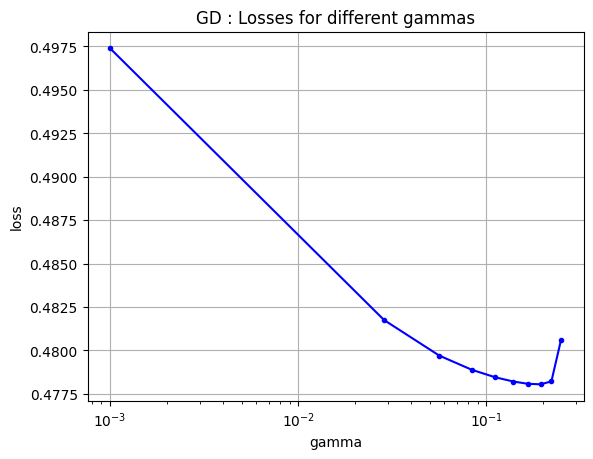

In [30]:
# plot losses for different gammas
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(gd_gammas, gd_losses, marker=".", color="b", label="loss")
plt.xlabel("gamma")
plt.ylabel("loss")
plt.title("GD : Losses for different gammas")
# plt.legend(loc=2)
plt.grid(True)
plt.show()

### Testing

In [31]:
best_gd_ws, best_gd_losses = imp.gradient_descent(
    y_train, x_train_cleaned, w_initial, max_iters, best_gd_gamma
)

In [32]:
best_w = best_gd_ws[np.argmin(best_gd_losses)]

In [33]:
# test the model
print("Loss:", imp.compute_loss(y_test, x_test_cleaned, best_w))

Loss: 0.4782052521785403


### Predictions

In [34]:
max_iters = 25
gd_gammas = np.linspace(0.001, 0.25, 10)
w_initial = np.zeros(X_train.shape[1])
gd_losses = np.zeros(len(gd_gammas))
for i, gamma in enumerate(gd_gammas):
    ws, losses = imp.gradient_descent(y, X_train, w_initial, max_iters, gamma)
    print(np.mean(losses))
    gd_losses[i] = np.mean(losses)

0.49743183482035225
0.4819939387580989
0.4799706718878409
0.4791608242617674
0.4787375313125037
0.47849421692685845
0.47836247703359425
0.4783340660103362
0.47850650881162893
0.48112842966361313


In [106]:
gamma = gd_gammas[np.argmin(gd_losses)]
w, l = imp.gradient_descent(y, X_train, w_initial, max_iters, gamma)
w = w[np.argmin(l)]
y_pred = X_test @ w
y_pred_GD = pre.threshold(y_pred)
hlp.create_csv_submission(test_ids_, y_pred_GD, "y_pred_GD.csv")

In [104]:
X_test.shape, len(w[0])

((109379, 162), 162)

# Stochastic Gradient Descent

### Hyperparameter tuning

In [36]:
max_iters = 25
gammas = np.linspace(0.0001, 0.2, 20)
batch_size = [32, 64, 128, 256, 512, 1024]
w_initial = np.zeros(x_train_cleaned.shape[1])
losses = np.zeros((len(gammas), len(batch_size)))

for i, gamma in enumerate(gammas):
    for j, batch in enumerate(batch_size):
        sgd_ws, sgd_losses = imp.stochastic_gradient_descent(
            y_train, x_train_cleaned, w_initial, max_iters, gamma, batch
        )
        print(np.mean(sgd_losses))
        losses[i][j] = np.mean(sgd_losses)

0.49964380030956174
0.49979994825650204
0.4996936708610626
0.499664175752834
0.4996999938026321
0.4997093427145492
0.4924553495076991
0.4885958836538441
0.48620766455137293
0.4854180149101204
0.4864246976734916
0.4855261162025785
0.49846364112323116
0.48943560202091996
0.48778373963383387
0.4857387773942072
0.4832626561636284
0.4827000605654687
0.5067568129106451
0.4955398226380905
0.4886322501512931
0.4838276322169343
0.48194457570228705
0.48203929277029706
0.9951163626627973
0.495858087270375
0.49244694587999627
0.4851253711524034
0.48206782043560037
0.48111448801671897
0.5394263752333468
0.5082472692396321
0.5077298774291531
0.4856216186782505
0.48319752784827436
0.4810829630835608
0.6434161841357462
0.5171928190140158
0.5204328924389517
0.48730873196316327
0.48298306238525973
0.48087921438790315
0.605838543630343
0.5242500762116732
0.502870856190068
0.48926603880939373
0.48324180152644564
0.4813387329264124
0.6456701196600069
0.5605747514534412
0.505080479146692
0.49580421654314466

In [37]:
# find best gamma and batch size combination
min_loss = np.min(losses)
min_loss_index = np.where(losses == min_loss)
best_gamma = gammas[min_loss_index[0][0]]
best_batch = batch_size[min_loss_index[1][0]]
print("Best gamma:", best_gamma)
print("Best batch size:", best_batch)
print("Min loss:", min_loss)

Best gamma: 0.0632263157894737
Best batch size: 1024
Min loss: 0.48087921438790315


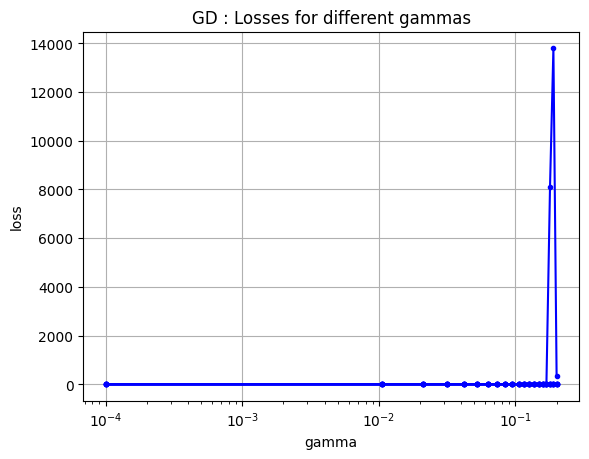

In [38]:
# plot losses for different gammas
plt.figure()
plt.semilogx(gammas, losses, marker=".", color="b", label="loss")
plt.xlabel("gamma")
plt.ylabel("loss")
plt.title("GD : Losses for different gammas")
# plt.legend(loc=2)
plt.grid(True)
plt.show()

### Testing

In [19]:
sgd_losses, sgd_ws = imp.stochastic_gradient_descent(
    y_train, x_train_cleaned, w_initial, max_iters, best_gamma, best_batch
)
best_w = sgd_ws[np.argmin(sgd_losses)]
loss = imp.compute_loss(y_test, x_test_cleaned, best_w)
print("Loss:", loss)

Loss: 0.48131786606214


# Least squares

### Testing (no tuning necessary)

In [20]:
w_least, loss_least = imp.least_squares(y_train, x_train_cleaned)
loss = imp.compute_loss(y_test, x_test_cleaned, w_least)
print("Loss:", loss)

Loss: 0.47846300865161434


# Logistic regression

In [39]:
param_grid = {
    "max_iters": [500, 1000, 1500],
    "gamma": [0.001, 0.01, 0.1],
    "lambda_": [0.01, 0.1, 1],
}

In [41]:
best_params = None
best_score = float("inf")

for max_iters in param_grid["max_iters"]:
    for gamma in param_grid["gamma"]:
        for lambda_ in param_grid["lambda_"]:
            w_initial = np.zeros(x_train_cleaned.shape[1])
            w, loss = imp.reg_logistic_regression(y_train, x_train_cleaned, lambda_, w_initial, max_iters, gamma)
            print("Loss:", loss)
            if loss < best_score:
                best_score = loss
                best_params = {
                    "max_iters": max_iters,
                    "gamma": gamma,
                    "lambda_": lambda_,
                }
                
                
print("Best hyperparameters found: ", best_params)

Loss: 0.6329097566747951
Loss: 0.6345196739971454
Loss: 0.6483371316196586
Loss: 0.5938236253700053
Loss: 0.6001339661998101
Loss: 0.6402005211126811
